# Hands-On Large Language Models Language Understanding and Generation (Jay Alammar, Maarten Grootendorst)


# Chapter 5: Text Clustering & Topic Modelling

In [32]:
from datasets import load_dataset

In [33]:
data = load_dataset('maartengr/arxiv_nlp')['train']
abstracts = data['Abstracts']
titles = data['Titles']

In [34]:
from sentence_transformers import SentenceTransformer

In [35]:
embedding_model = SentenceTransformer('thenlper/gte-small')
embeddings = embedding_model.encode(abstracts, show_progress_bar = True)

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [36]:
embeddings.shape

(44949, 384)

In [37]:
from umap import UMAP

In [38]:
umap_model = UMAP(n_components = 5, min_dist = 0.0, metric = 'cosine', random_state = 42)
reduced_embeddings = umap_model.fit_transform(embeddings)

In [39]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size = 50, metric = 'euclidean', cluster_selection_method = 'eom').fit(reduced_embeddings)
clusters = hdbscan_model.labels_

In [40]:
len(set(clusters))

155

In [41]:
import numpy as np
cluster = 0
for index in np.where(clusters==cluster)[0][:3]:
  print(abstracts[int(index)][:300] + "... \n")

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo... 

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang... 

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf... 



In [42]:
import pandas as pd

reduced_embeddings = UMAP(n_components=2, min_dist=0.0, metric="cosine", random_state=42).fit_transform(embeddings)

In [43]:
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

In [44]:
to_plot = df.loc[df.cluster != "-1", :]
outliers = df.loc[df.cluster == "-1", :]

In [45]:
to_plot

x         y                                              title  \
4      4.221267  2.024049  Segmentation and Context of Literary and Music...   
5      3.435502  0.378026  International Standard for a Linguistic Annota...   
6      3.407339  0.475730  A Formal Model of Dictionary Structure and Con...   
8      3.172687  1.256287  Learning Probabilistic Models of Word Sense Di...   
11    -2.743708  0.950555  Bio-linguistic transition and Baldwin effect i...   
...         ...       ...                                                ...   
44937  3.180399  1.268969  Selective Sampling for Example-based Word Sens...   
44938  0.561603 -1.806879  Practical experiments with regular approximati...   
44939 -3.860581 -0.719982  Question Answering System Using Syntactic Info...   
44941 -0.072745 -3.836390  Resolution of Indirect Anaphora in Japanese Se...   
44947  3.609940  0.017809   HMM Specialization with Selective Lexicalization   

      cluster  
4          11  
5         108  
6         108  
8         128  
11         95  
...       ...  
44937     128  
44938     120  
44939      91  
44941      10  
44947     140  

[30119 rows x 4 columns]

(np.float64(-7.282655382156372),
 np.float64(11.277046823501587),
 np.float64(-6.28760678768158),
 np.float64(10.93724067211151))

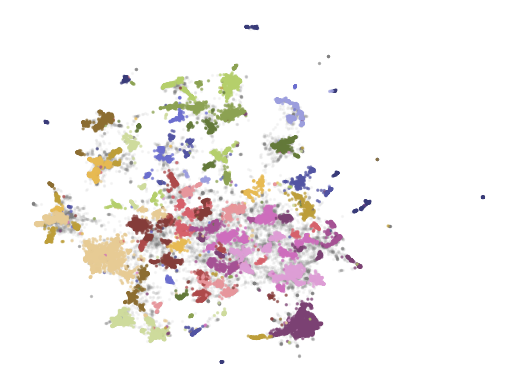

In [46]:
import matplotlib.pyplot as plt
# Plot outliers and non-outliers separately
plt.scatter(outliers.x, outliers.y, alpha=0.05, s=2, c="grey")
plt.scatter(to_plot.x, to_plot.y, c=to_plot.cluster.astype(int), alpha=0.6, s=2, cmap="tab20b")
plt.axis("off")

In [47]:
!pip install bertopic

In [48]:
from bertopic import BERTopic

topic_model = BERTopic(embedding_model=embedding_model, umap_model=umap_model, hdbscan_model=hdbscan_model, verbose=True).fit(abstracts, embeddings)

2026-01-09 18:01:28,435 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2026-01-09 18:02:17,558 - BERTopic - Dimensionality - Completed ✓
2026-01-09 18:02:17,560 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-09 18:02:19,704 - BERTopic - Cluster - Completed ✓
2026-01-09 18:02:19,716 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-09 18:02:23,572 - BERTopic - Representation - Completed ✓


In [49]:
topic_model.get_topic_info()

Topic  Count                                           Name  \
0       -1  14830                               -1_the_of_and_to   
1        0   2203                 0_question_qa_answer_questions   
2        1   1972                   1_speech_asr_recognition_end   
3        2    859              2_hate_offensive_speech_detection   
4        3    848  3_summarization_summaries_summary_abstractive   
..     ...    ...                                            ...   
150    149     53           149_counseling_mental_therapy_health   
151    150     53                150_mixed_code_sentiment_mixing   
152    151     53      151_prompt_prompts_optimization_prompting   
153    152     50                 152_long_context_window_length   
154    153     50                     153_chatgpt_its_openai_has   

                                        Representation  \
0    [the, of, and, to, in, we, for, language, that...   
1    [question, qa, answer, questions, answering, a...   
2    [speech, asr, recognition, end, acoustic, spea...   
3    [hate, offensive, speech, detection, toxic, so...   
4    [summarization, summaries, summary, abstractiv...   
..                                                 ...   
150  [counseling, mental, therapy, health, psychoth...   
151  [mixed, code, sentiment, mixing, english, anal...   
152  [prompt, prompts, optimization, prompting, llm...   
153  [long, context, window, length, llms, contexts...   
154  [chatgpt, its, openai, has, ai, tasks, respons...   

                                   Representative_Docs  
0    [  Word Representations form the core componen...  
1    [  With the development of deep learning techn...  
2    [  End-to-end Speech Translation (ST) models h...  
3    [  With growing role of social media in shapin...  
4    [  Pre-trained neural abstractive summarizatio...  
..                                                 ...  
150  [  Mental health care poses an increasingly se...  
151  [  The usage of more than one language in the ...  
152  [  Prompt optimization aims to find the best p...  
153  [  Extending the context window of large langu...  
154  [  Recently, ChatGPT has attracted great atten...  

[155 rows x 5 columns]

In [50]:
topic_model.get_topic(0)

[('question', np.float64(0.021513659402328498)),
 ('qa', np.float64(0.01599542005307066)),
 ('answer', np.float64(0.01598355249769436)),
 ('questions', np.float64(0.015939920753689895)),
 ('answering', np.float64(0.015001840362609379)),
 ('answers', np.float64(0.009914565594237793)),
 ('retrieval', np.float64(0.009494874277091257)),
 ('comprehension', np.float64(0.007755949913161138)),
 ('reading', np.float64(0.0072157025360459525)),
 ('knowledge', np.float64(0.006384494984848137))]

In [51]:
topic_model.find_topics("topic modeling")

([26, -1, 47, 34, 112],
 [np.float32(0.9548121),
  np.float32(0.9118329),
  np.float32(0.90837073),
  np.float32(0.90527934),
  np.float32(0.9039324)])

In [52]:
topic_model.get_topic(22)

[('classification', np.float64(0.027700659966214014)),
 ('label', np.float64(0.027298282460681503)),
 ('labels', np.float64(0.017843140375134993)),
 ('text', np.float64(0.01573274215114283)),
 ('hierarchical', np.float64(0.009962405511364982)),
 ('document', np.float64(0.008967767600591724)),
 ('class', np.float64(0.008105128616428021)),
 ('documents', np.float64(0.0077769277051026025)),
 ('hierarchy', np.float64(0.007529893215227781)),
 ('multi', np.float64(0.006948802731317293))]

In [53]:
topic_model.topics_[titles.index("BERTopic: Neural topic modeling with a class-based TF-IDF procedure")]

26

In [54]:
fig = topic_model.visualize_documents(list(titles), reduced_embeddings=reduced_embeddings, width=1200, hide_annotations=True)

fig.update_layout(font=dict(size=16))

In [55]:
topic_model.visualize_barchart()

In [56]:
topic_model.visualize_heatmap(n_clusters=30)

In [57]:
topic_model.visualize_hierarchy()

In [58]:
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [59]:
def topic_differences(model, original_topics, nr_topics=5):
  """Show the differences in topic representations between two models """
  df = pd.DataFrame(columns=["Topic", "Original", "Updated"])
  for topic in range(nr_topics):
    # Extract top 5 words per topic per model
    og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
    new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])
    df.loc[len(df)] = [topic, og_words, new_words]
    return df

In [60]:
from bertopic.representation import KeyBERTInspired

representation_model = KeyBERTInspired()
topic_model.update_topics(abstracts, representation_model=representation_model)
topic_differences(topic_model, original_topics)

Topic                                        Original  \
0      0  question | qa | answer | questions | answering   

                                             Updated  
0  questions | answering | comprehension | questi...

In [65]:
from transformers import pipeline
from bertopic.representation import TextGeneration
prompt = """I have a topic that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords: '[KEYWORDS]'.
Based on the documents and keywords, what is this topic about?"""
# Update our topic representations using Flan-T5
generator = pipeline("text2text-generation", model="google/flan-t5-small")
representation_model = TextGeneration(generator, prompt=prompt, doc_length=50, tokenizer="whitespace")
topic_model.update_topics(abstracts, representation_model=representation_model)
topic_differences(topic_model, original_topics)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
100%|██████████| 155/155 [00:51<00:00,  2.99it/s]


Topic                                        Original  \
0      0  question | qa | answer | questions | answering   

                                             Updated  
0  Question answering is one of the most importan...

**Note:** Only use the next cells if you have openai api keys

In [ ]:
import openai
from bertopic.representation import OpenAI
prompt = """
I have a topic that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords: [KEYWORDS]
Based on the information above, extract a short topic label in the following
format:
topic: <short topic label>
"""
# Update our topic representations using GPT-3.5
client = openai.OpenAI(api_key="YOUR_KEY_HERE")
representation_model = OpenAI(
client, model="gpt-3.5-turbo", exponential_backoff=True, chat=True,
prompt=prompt
)
topic_model.update_topics(abstracts, representation_model=representation_model)
# Show topic differences
topic_differences(topic_model, original_topics)

In [ ]:
fig = topic_model.visualize_document_datamap(titles, topics=list(range(20)), reduced_embeddings=reduced_embeddings, width=1200, label_font_size=11, label_wrap_width=20, use_medoids=True)